<a href="https://colab.research.google.com/github/raulbenitez/IWANN21/blob/main/MNIST_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST data exploration

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Visualize image dataset 

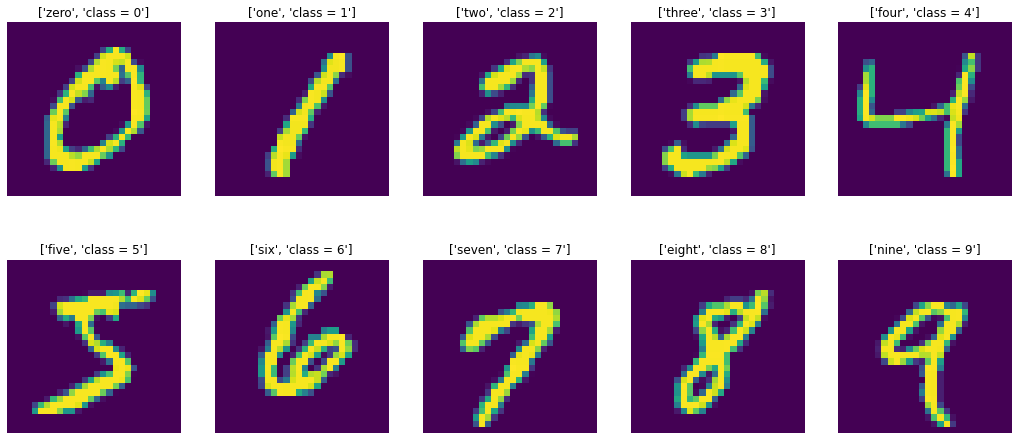

In [4]:
import skimage as sk # load skimage libraries
from skimage import io
import matplotlib.pylab as plt

label_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

fig = plt.figure(figsize=(18, 8))

for kclass in range(0,10):
    ind = np.argwhere(y_train==kclass)
    ax = fig.add_subplot(2, 5, kclass+1)
    ax.imshow(x_train[ind[0][0]].squeeze())
    ax.set_title([label_names[kclass], 'class = {}'.format(kclass)])
    ax.axis('off')

# Low-dimension projections of the MNIST test data subset

## PCA projection

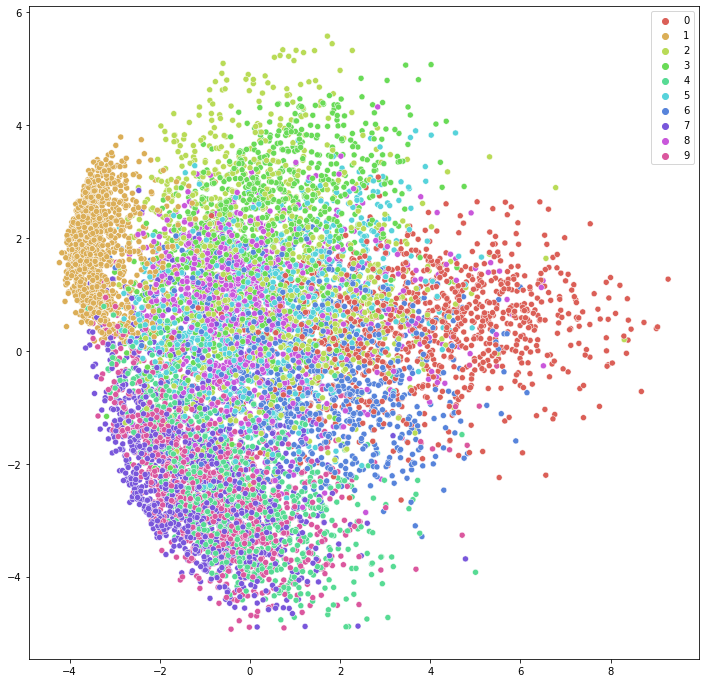

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Reshape as NOBSERVATIONS x NPIXELS:
train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])


# Scale (Standardization)
train = StandardScaler().fit_transform(test)

# PROJECT TO A 2D PCA SPACE:
pca = PCA(n_components=2)
pca_proj = pca.fit_transform(test)

fig = plt.figure(figsize=(12,12))
sns.scatterplot(x = pca_proj[:,0], y = pca_proj[:,1], hue = y_test, palette = sns.hls_palette(10), legend = 'full')

No surprise that all classes are entangled in the 2d PCA projection since the variance explained by a 2D PCA projection is only a fraction of the total variability:

In [6]:
pca.explained_variance_ratio_.cumsum()

array([0.10047705, 0.17592227], dtype=float32)

## T-SNE projection 

(CPU time = 4.24 min , 3.51 min with GPU)

https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf



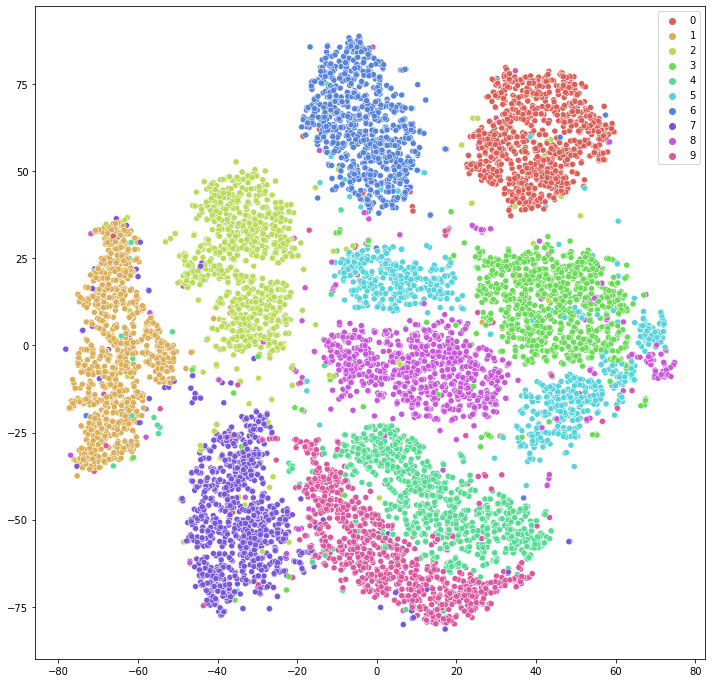

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(test)

fig = plt.figure(figsize=(12,12))
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = y_test, palette = sns.hls_palette(10), legend = 'full');

# PCA + t-SNE

Let's first project into a PCA space explaining 95% of the variability and then visualize the PCA projection using a 2D t-SNE manifold

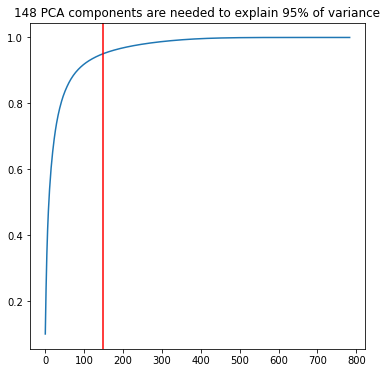

In [8]:
pca_full = PCA(n_components=test.shape[1])
pca_full.fit(test)

cummulative_variance = pca_full.explained_variance_ratio_.cumsum()

# Find number of components needed to explain 95% of variance:
ind= np.argwhere(cummulative_variance>0.95)
Ncomponents_95 = ind[0].item()

fig = plt.figure(figsize=(6,6))
plt.plot(cummulative_variance)
plt.axvline(Ncomponents_95,c='r')
plt.title('{} PCA components are needed to explain 95% of variance'.format(Ncomponents_95))
plt.show()

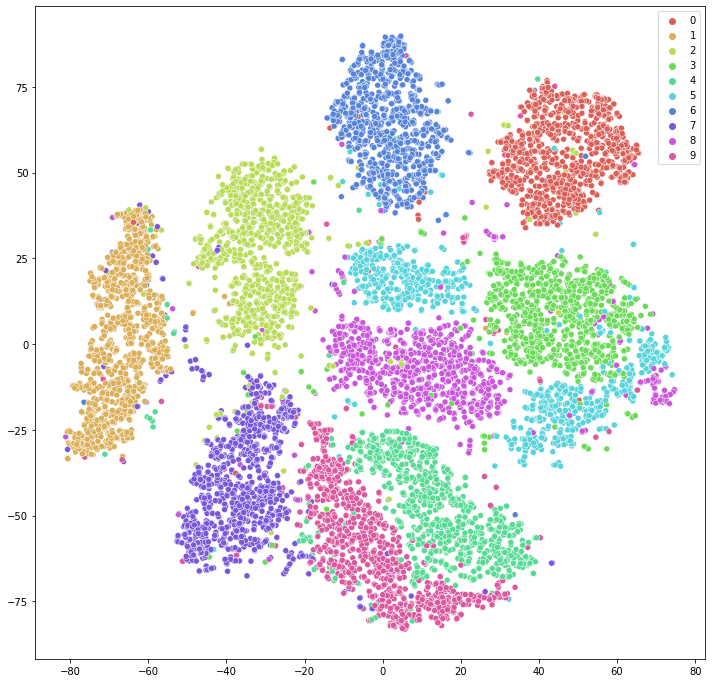

In [9]:
pca95 = PCA(n_components=Ncomponents_95)
pca95_proj = pca95.fit_transform(test)

tsne = TSNE(n_components = 2, random_state=0)
tsne_pca = tsne.fit_transform(pca95_proj)

fig = plt.figure(figsize=(12,12))
sns.scatterplot(x = tsne_pca[:,0], y = tsne_pca[:,1], hue = y_test, palette = sns.hls_palette(10), legend = 'full');

PCA as feature extraction works pretty well (eigenfaces)

# Unsupervised approach: Clustering: 
In this space we could apply an unsupervised clustering approach to identfy each cluster:

In [11]:
X = tsne_pca[:,0:2]
X.shape

(10000, 2)

[204008.7307936499]
[204008.7307936499, 202474.01120280204]
[204008.7307936499, 202474.01120280204, 200452.6897028455]
[204008.7307936499, 202474.01120280204, 200452.6897028455, 199225.4754589978]
[204008.7307936499, 202474.01120280204, 200452.6897028455, 199225.4754589978, 197738.31997536833]
[204008.7307936499, 202474.01120280204, 200452.6897028455, 199225.4754589978, 197738.31997536833, 197581.35631593558]
[204008.7307936499, 202474.01120280204, 200452.6897028455, 199225.4754589978, 197738.31997536833, 197581.35631593558, 197247.97624335458]
[204008.7307936499, 202474.01120280204, 200452.6897028455, 199225.4754589978, 197738.31997536833, 197581.35631593558, 197247.97624335458, 195303.1595212368]
[204008.7307936499, 202474.01120280204, 200452.6897028455, 199225.4754589978, 197738.31997536833, 197581.35631593558, 197247.97624335458, 195303.1595212368, 195244.43665051248]
[204008.7307936499, 202474.01120280204, 200452.6897028455, 199225.4754589978, 197738.31997536833, 197581.3563159355

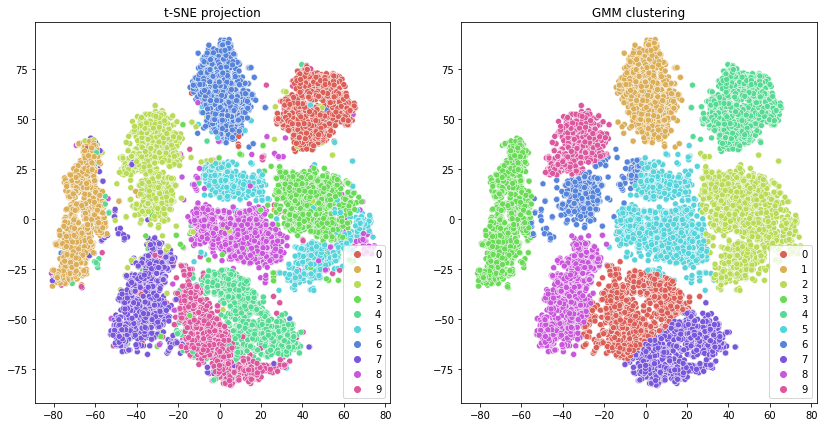

In [26]:
from sklearn import mixture

X = tsne_pca[:,0:2]

NMAX =30
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(X)
    bic.append(gmm.bic(X))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(X)


plt.figure(figsize=(14,7))

ax0 = plt.subplot(1,2,1)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_test, palette = sns.hls_palette(10), legend = 'full');
plt.title("t-SNE projection")

ax1 = plt.subplot(1,2,2)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_pred_gmm, palette = sns.hls_palette(10));
plt.title("GMM clustering")
plt.show()

Digits (0, 6, 1, 7) can be easily identified as an isolated cluster
Digits 2 is identified as two subgroups
Digits 4 and 9 are difficult to distinguish
Digits 5 and 8 are grouped together as a single cluster



## UMAP Projection

https://arxiv.org/abs/1802.03426

https://umap-learn.readthedocs.io/en/latest/

First, install UMAP library in google colab platform

In [27]:
!pip install umap-learn

     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 1.2MB 16.1MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=afa4f710d4ded6e44b8993aae245db2fbd27293ddd6d681f0b2ac598900b4881
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=440af1f49d3dea8d1ed43d6776133be135ca9bb4fcaedda7ce8f203d4132847b
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [28]:
import umap
embedding = umap.UMAP(n_neighbors=5).fit_transform(test)

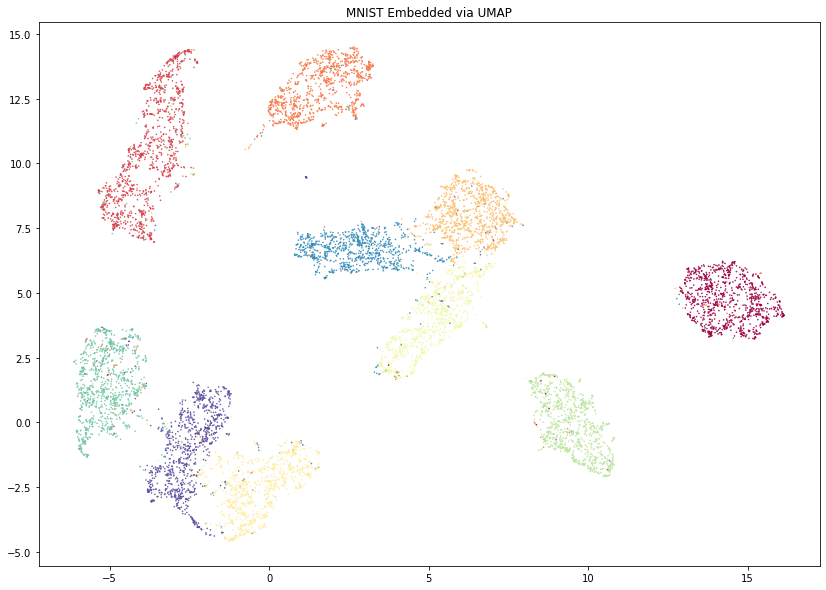

In [30]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=y_test, cmap='Spectral', alpha=1.0)
plt.title('MNIST Embedded via UMAP');

Let's try now the clustering 

[124854.82504316203]
[124854.82504316203, 121270.79318301151]
[124854.82504316203, 121270.79318301151, 114299.96527500654]
[124854.82504316203, 121270.79318301151, 114299.96527500654, 109325.56093549189]
[124854.82504316203, 121270.79318301151, 114299.96527500654, 109325.56093549189, 107963.49769771066]
[124854.82504316203, 121270.79318301151, 114299.96527500654, 109325.56093549189, 107963.49769771066, 103813.64125725039]
[124854.82504316203, 121270.79318301151, 114299.96527500654, 109325.56093549189, 107963.49769771066, 103813.64125725039, 102404.11103479561]
[124854.82504316203, 121270.79318301151, 114299.96527500654, 109325.56093549189, 107963.49769771066, 103813.64125725039, 102404.11103479561, 97754.3492473418]
[124854.82504316203, 121270.79318301151, 114299.96527500654, 109325.56093549189, 107963.49769771066, 103813.64125725039, 102404.11103479561, 97754.3492473418, 97755.499513393]
[124854.82504316203, 121270.79318301151, 114299.96527500654, 109325.56093549189, 107963.4976977106

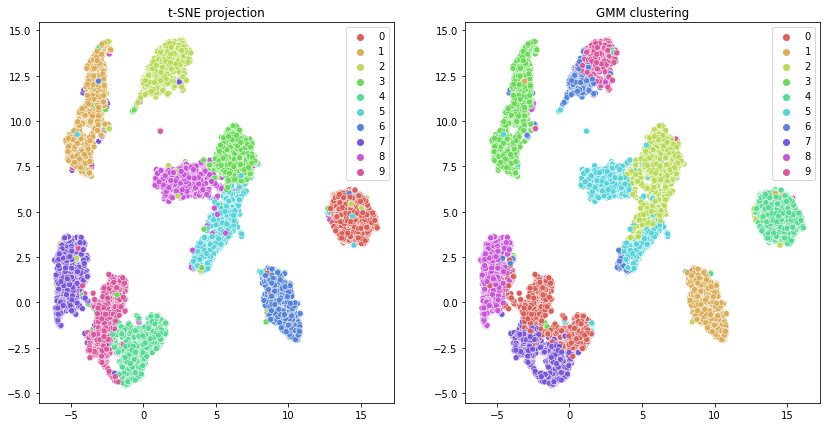

In [34]:
from sklearn import mixture

X = embedding

NMAX =30
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(X)
    bic.append(gmm.bic(X))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(X)


plt.figure(figsize=(14,7))

ax0 = plt.subplot(1,2,1)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_test, palette = sns.hls_palette(10), legend = 'full');
plt.title("t-SNE projection")

ax1 = plt.subplot(1,2,2)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_pred_gmm, palette = sns.hls_palette(10));
plt.title("GMM clustering")
plt.show()

Similar problems are observed when using the UMAP embedding 